# K Mean Clustering

Objective: Product clustering  
Dataset: WholesaleData.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('WholesaleData.csv')
print(data.shape)
data.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration

1    298
2    142
Name: Channel, dtype: int64


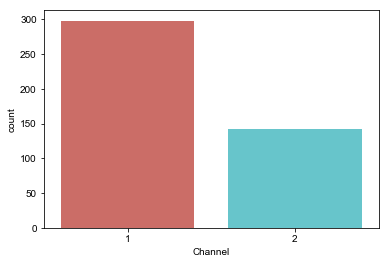

In [2]:
print(data['Channel'].value_counts())

sns.countplot(x='Channel',data = data, palette='hls',order = data['Channel'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

3    316
1     77
2     47
Name: Region, dtype: int64


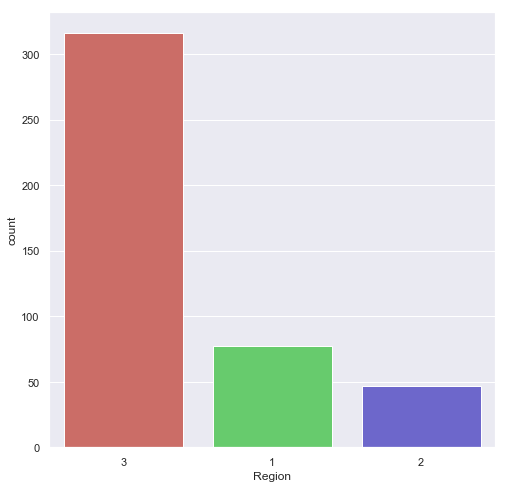

In [3]:
print(data['Region'].value_counts())

sns.countplot(x='Region',data = data, palette='hls',order = data['Region'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

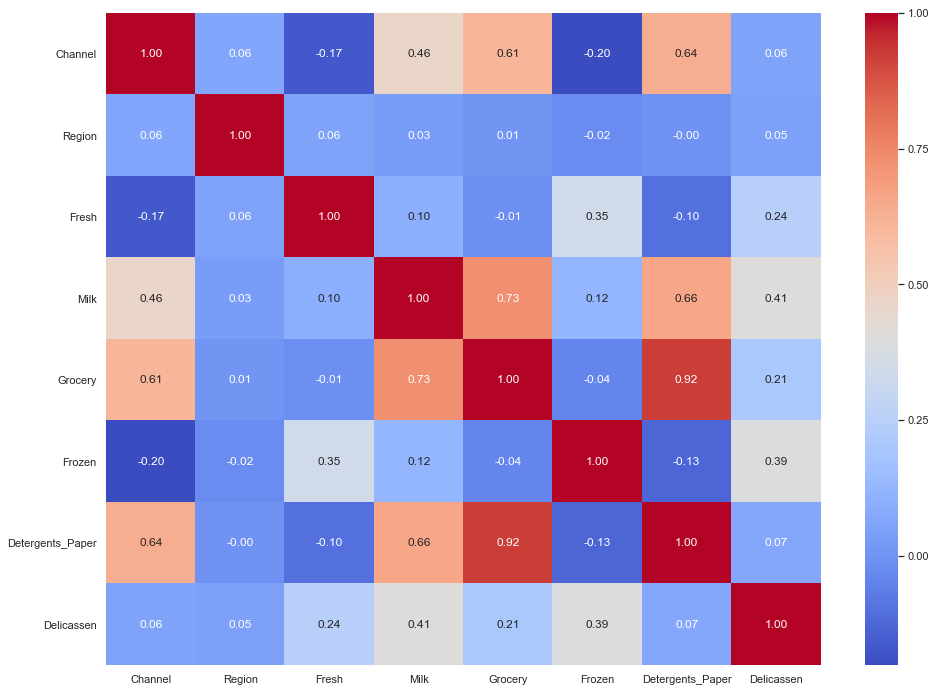

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["Channel"].sort_values(ascending=False)

Channel             1.000000
Detergents_Paper    0.636026
Grocery             0.608792
Milk                0.460720
Region              0.062028
Delicassen          0.056011
Fresh              -0.169172
Frozen             -0.202046
Name: Channel, dtype: float64

## Categorical and Continous Features

In [6]:
categorical_features = ['Channel', 'Region']
continuous_features  = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

data[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Convert Categorical to Binary

In [7]:
#using get dummies
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


## Data Standardization

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (440, 11)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373, 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

## Find the Best K

In [9]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[411.82878995921095, 213.39898477020844, 117.07252399254907, 71.38989240243725, 37.922437718162826, 19.418928179725288, 15.67916418107215, 13.129100808295878, 11.732632075258088, 10.656257033418136, 9.733004262965387, 9.16945441694233, 8.510815137657012, 7.6410351709054565]


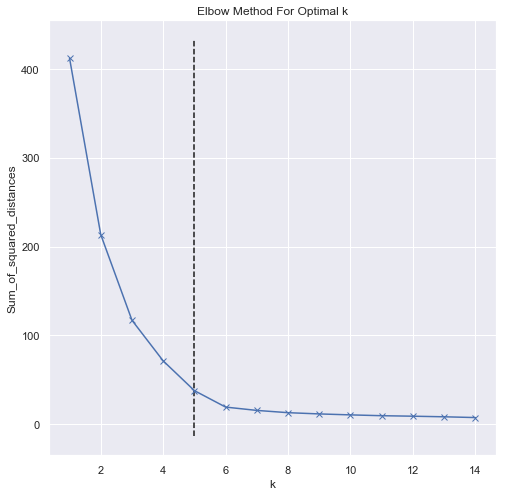

The best k: 5


In [10]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [11]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (440,)


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

## Assign Labels Cluster to Dataframe

In [12]:
data["KM_Cluster"] = labels
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,KM_Cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,1


## Cluster 2D Visualization

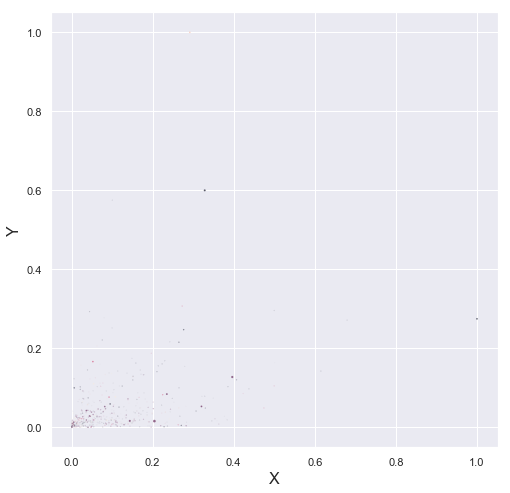

In [13]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

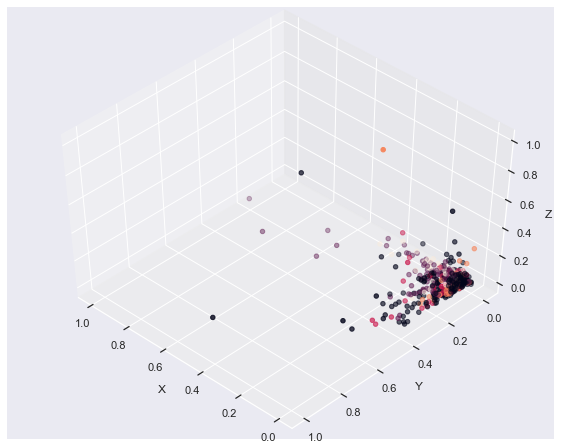

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

0    211
1    105
2     59
4     37
3     28
Name: KM_Cluster, dtype: int64


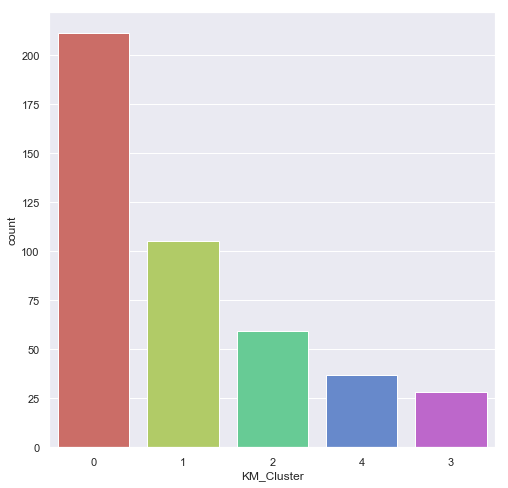

In [15]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [16]:
data[data['KM_Cluster']== 0].head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,KM_Cluster
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0
8,5963,3648,6192,425,1716,750,1,0,0,0,1,0
15,10253,1114,3821,397,964,412,1,0,0,0,1,0
17,5876,6157,2933,839,370,4478,1,0,0,0,1,0
19,7780,2495,9464,669,2518,501,1,0,0,0,1,0
21,5567,871,2010,3383,375,569,1,0,0,0,1,0
22,31276,1917,4469,9408,2381,4334,1,0,0,0,1,0
26,9898,961,2861,3151,242,833,1,0,0,0,1,0
27,14276,803,3045,485,100,518,1,0,0,0,1,0
29,43088,2100,2609,1200,1107,823,1,0,0,0,1,0
